In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from functools import cmp_to_key
%matplotlib inline

In [2]:
sns.set_style('whitegrid')

In [3]:
ratings = pd.read_csv('../data/ratings.csv', index_col=False)

In [4]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97510 entries, 0 to 97509
Data columns (total 12 columns):
id                97510 non-null int64
name              97510 non-null object
age               97510 non-null int64
position          97510 non-null object
nationality       97510 non-null object
overall           97510 non-null int64
potential         97510 non-null int64
number            97510 non-null int64
team              97510 non-null object
league            97510 non-null object
season            97510 non-null object
position_group    97510 non-null object
dtypes: int64(5), object(7)
memory usage: 8.9+ MB


In [5]:
ratings.sort_values(by=['overall'], inplace=True, ascending=False)

In [6]:
ratings.head()

,id,name,age,position,nationality,overall,potential,number,team,league,season,position_group
70897,70898,Thierry Henry,27,RS,France,97,99,14,Arsenal,Premier League,2004/2005,FW
70981,70982,Gianluigi Buffon,26,GK,Italy,97,99,1,Juventus,Serie A TIM,2004/2005,GK
71117,71118,Zinedine Zidane,32,LCAM,France,96,99,5,Real Madrid,LaLiga Santander,2004/2005,MD
50542,50543,Ronaldinho,25,CF,Brazil,95,88,10,FC Barcelona,LaLiga Santander,2005/2006,FW
70973,70974,Ruud van Nistelrooy,28,RS,Netherlands,95,99,10,Manchester United,Premier League,2004/2005,FW


In [7]:
def compare_seasons(season_one, season_two):
    season_one = int(season_one.split('/')[0])
    season_two = int(season_two.split('/')[0])
    if season_one == season_two:
        return 0
    elif season_one > season_two:
        return 1
    else:
        return -1

In [8]:
seasons = list(ratings.season.unique())
seasons = sorted(seasons, key=cmp_to_key(compare_seasons))
seasons

['2004/2005',
 '2005/2006',
 '2006/2007',
 '2007/2008',
 '2008/2009',
 '2009/2010',
 '2010/2011',
 '2011/2012',
 '2012/2013',
 '2013/2014',
 '2014/2015',
 '2015/2017',
 '2016/2017',
 '2017/2018',
 '2018/2019',
 '2019/2020']

In [9]:
leagues = list(ratings.league.unique())

In [10]:
leagues

['Premier League',
 'Serie A TIM',
 'LaLiga Santander',
 'Bundesliga',
 'Ligue 1 Conforama',
 'Calcio B',
 'Eredivisie',
 'LaLiga SmartBank',
 'EFL Championship',
 'Bundesliga 2',
 'Domino’s Ligue 2']

In [11]:
top_five_leagues = ['Premier League','Serie A TIM','LaLiga Santander','Bundesliga', 'Ligue 1 Conforama']
top_five_leagues.sort()
top_five_leagues

['Bundesliga',
 'LaLiga Santander',
 'Ligue 1 Conforama',
 'Premier League',
 'Serie A TIM']

In [12]:
# remove duplicated players for better overall analysis for all FIFA
deduped_ratings = ratings.drop_duplicates(subset=['name'], keep ='first')

# Player Overalls Analysis

### Top 10 Players FIFA 20 - FIFA 05 (Inclusive)

In [13]:
deduped_ratings[0:10]

,id,name,age,position,nationality,overall,potential,number,team,league,season,position_group
70897,70898,Thierry Henry,27,RS,France,97,99,14,Arsenal,Premier League,2004/2005,FW
70981,70982,Gianluigi Buffon,26,GK,Italy,97,99,1,Juventus,Serie A TIM,2004/2005,GK
71117,71118,Zinedine Zidane,32,LCAM,France,96,99,5,Real Madrid,LaLiga Santander,2004/2005,MD
50542,50543,Ronaldinho,25,CF,Brazil,95,88,10,FC Barcelona,LaLiga Santander,2005/2006,FW
70973,70974,Ruud van Nistelrooy,28,RS,Netherlands,95,99,10,Manchester United,Premier League,2004/2005,FW
54877,54878,Iker Casillas,24,GK,Spain,95,86,1,Real Madrid,LaLiga Santander,2005/2006,GK
94820,94821,Lionel Messi,31,RS,Argentina,94,94,10,FC Barcelona,LaLiga Santander,2017/2018,FW
142,143,Cristiano Ronaldo,32,LW,Portugal,94,94,7,Real Madrid CF,LaLiga Santander,2016/2017,FW
54781,54782,Petr Cech,23,GK,Czech Republic,94,93,1,Chelsea,Premier League,2005/2006,GK
70894,70895,Patrick Vieira,28,RCM,France,94,99,4,Arsenal,Premier League,2004/2005,MD


### Top 20 Players FIFA 20 - FIFA 05 

In [14]:
deduped_ratings[0:20]

,id,name,age,position,nationality,overall,potential,number,team,league,season,position_group
70897,70898,Thierry Henry,27,RS,France,97,99,14,Arsenal,Premier League,2004/2005,FW
70981,70982,Gianluigi Buffon,26,GK,Italy,97,99,1,Juventus,Serie A TIM,2004/2005,GK
71117,71118,Zinedine Zidane,32,LCAM,France,96,99,5,Real Madrid,LaLiga Santander,2004/2005,MD
50542,50543,Ronaldinho,25,CF,Brazil,95,88,10,FC Barcelona,LaLiga Santander,2005/2006,FW
70973,70974,Ruud van Nistelrooy,28,RS,Netherlands,95,99,10,Manchester United,Premier League,2004/2005,FW
54877,54878,Iker Casillas,24,GK,Spain,95,86,1,Real Madrid,LaLiga Santander,2005/2006,GK
94820,94821,Lionel Messi,31,RS,Argentina,94,94,10,FC Barcelona,LaLiga Santander,2017/2018,FW
142,143,Cristiano Ronaldo,32,LW,Portugal,94,94,7,Real Madrid CF,LaLiga Santander,2016/2017,FW
54781,54782,Petr Cech,23,GK,Czech Republic,94,93,1,Chelsea,Premier League,2005/2006,GK
70894,70895,Patrick Vieira,28,RCM,France,94,99,4,Arsenal,Premier League,2004/2005,MD


### Top 50 Players FIFA 20 - FIFA 05

In [15]:
deduped_ratings[0:50]

,id,name,age,position,nationality,overall,potential,number,team,league,season,position_group
70897,70898,Thierry Henry,27,RS,France,97,99,14,Arsenal,Premier League,2004/2005,FW
70981,70982,Gianluigi Buffon,26,GK,Italy,97,99,1,Juventus,Serie A TIM,2004/2005,GK
71117,71118,Zinedine Zidane,32,LCAM,France,96,99,5,Real Madrid,LaLiga Santander,2004/2005,MD
50542,50543,Ronaldinho,25,CF,Brazil,95,88,10,FC Barcelona,LaLiga Santander,2005/2006,FW
70973,70974,Ruud van Nistelrooy,28,RS,Netherlands,95,99,10,Manchester United,Premier League,2004/2005,FW
54877,54878,Iker Casillas,24,GK,Spain,95,86,1,Real Madrid,LaLiga Santander,2005/2006,GK
94820,94821,Lionel Messi,31,RS,Argentina,94,94,10,FC Barcelona,LaLiga Santander,2017/2018,FW
142,143,Cristiano Ronaldo,32,LW,Portugal,94,94,7,Real Madrid CF,LaLiga Santander,2016/2017,FW
54781,54782,Petr Cech,23,GK,Czech Republic,94,93,1,Chelsea,Premier League,2005/2006,GK
70894,70895,Patrick Vieira,28,RCM,France,94,99,4,Arsenal,Premier League,2004/2005,MD


In [16]:
deduped_ratings[0:100]

,id,name,age,position,nationality,overall,potential,number,team,league,season,position_group
70897,70898,Thierry Henry,27,RS,France,97,99,14,Arsenal,Premier League,2004/2005,FW
70981,70982,Gianluigi Buffon,26,GK,Italy,97,99,1,Juventus,Serie A TIM,2004/2005,GK
71117,71118,Zinedine Zidane,32,LCAM,France,96,99,5,Real Madrid,LaLiga Santander,2004/2005,MD
50542,50543,Ronaldinho,25,CF,Brazil,95,88,10,FC Barcelona,LaLiga Santander,2005/2006,FW
70973,70974,Ruud van Nistelrooy,28,RS,Netherlands,95,99,10,Manchester United,Premier League,2004/2005,FW
...,...,...,...,...,...,...,...,...,...,...,...,...
70899,70900,Dennis Bergkamp,35,CF,Netherlands,90,96,10,Arsenal,Premier League,2004/2005,FW
0,1,Marc-André ter Stegen,28,GK,Germany,90,93,1,FC Barcelona,LaLiga Santander,2019/2020,GK
66359,66360,Michael Ballack,28,LCM,Germany,90,99,13,Bayern Munich,Bundesliga,2004/2005,MD
66287,66288,Frank Lampard,26,RCM,England,90,96,8,Chelsea,Premier League,2004/2005,MD


## Deeper Dive into The 100 Rated players FIFA 20 - FIFA 05

In [17]:
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    if absolute >= 5:
        return "{:.1f}%".format(pct, absolute)
    
def plot_breakdowns_for_data(data):
    fig, axes = plt.subplots(nrows=2, ncols=2, subplot_kw=dict(aspect='equal'), figsize=(15,10))
    breakdown = ['nationality', 'league', 'position_group', 'season']
    start = 0
    for index, row in enumerate(axes):
        for j_index, ax in enumerate(row):
            data_breakdown = data[breakdown[start]].value_counts()
            values = data_breakdown.values
            indexes = data_breakdown.index

            wedges, texts, autotexts = ax.pie(values, autopct=lambda pct: func(pct, values),
                                      textprops=dict(color="w"))

            plt.setp(autotexts, size=9, weight="bold")
            ax.set_title('{} Precentage Contribution to Top {} Players FIFA 20 - FIFA 05'.format(breakdown[start], len(data)), fontsize=11)
            ax.legend(wedges, indexes, bbox_to_anchor=(1,0,0.5,1))
            start = start + 1

    fig.tight_layout(pad=3)

### Nationality, League, Position Group and Season Contribution to TOP 100 Players FIFA 20 - FIFA 06

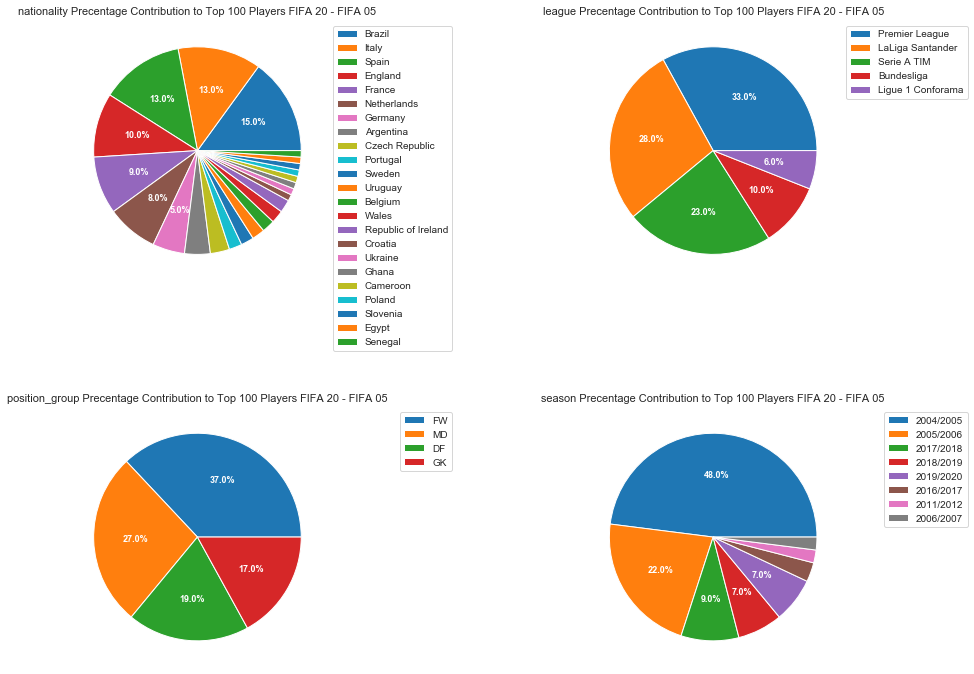

In [18]:
plot_breakdowns_for_data(deduped_ratings[0:100])

An interesting take away fromn the above pis charts and graph is the influence of Brazil, Having almost 8 times as few players in the First and Second Division of Europes top five leagues as the top contrinbutor Spain they have the highest percentage of players in the Top 100 Highest Rated Players as well as having an 8% contribution to the Top 100 Highest potential players. This speaks to the quality of Brazilian players that make it to Europe and play consistently.  

### Country V Player Distribution (FIFA 20 - FIFA 05)

In [19]:
top_50_countries = deduped_ratings['nationality'].value_counts()[0:50]

Text(0, 0.5, 'Number of Players')

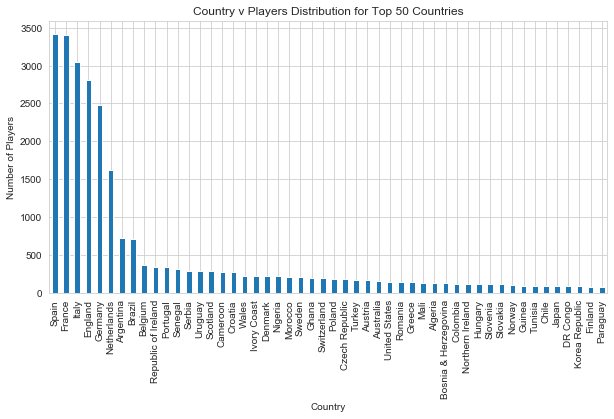

In [20]:
plt.figure(figsize=(10,5))
top_50_countries.plot(kind='bar')
plt.title('Country v Players Distribution for Top 50 Countries')
plt.xlabel('Country')
plt.ylabel('Number of Players')

### Overalls Distribution for all Players in FIFA over the last 16 Years

Text(0.5, 1.0, 'Overall Ratings Distribution for All Players (FIFA20 - FIFA05 Inclusive)')

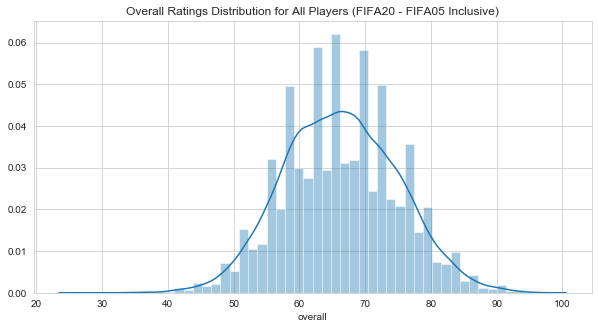

In [21]:
plt.figure(figsize=(10,5))
sns.distplot(deduped_ratings['overall'])
plt.title('Overall Ratings Distribution for All Players (FIFA20 - FIFA05 Inclusive)')

### Potentials Distribution for all Players in Fifa Over the last 16 Years

Text(0.5, 1.0, 'Overall Player Potential Distribution for All Players (FIFA20 - FIFA05 Inclusive)')

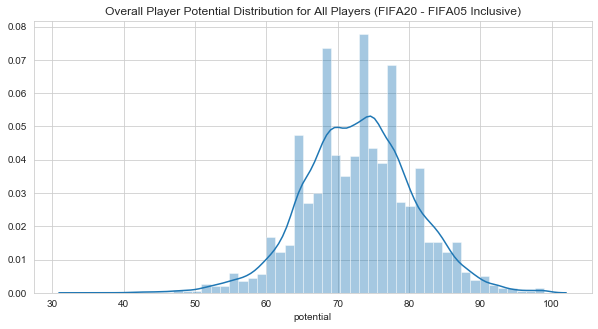

In [22]:
plt.figure(figsize=(10,5))
sns.distplot(deduped_ratings['potential'])
plt.title('Overall Player Potential Distribution for All Players (FIFA20 - FIFA05 Inclusive)')

Both the player overalls and player potentials for the past 16 years of Fifa follow a normal distribution

## WonderKids Analysis

### Top 20 Wonderkids in Fifa over the last 16 years of the game

A wonder kid can be classed as a player under the age of 21, any player over this age will not be included in the criteria for this sort. This is of personal selection and the age can vary based on opinion

__Note__ As there are multiple versions of players over the various stages of fifa, when analysing the potential ratings of the players we are taking the highest potential version (we are optimists!!) as we assume this is the max cieling FIFA thought the player may hit

In [28]:
potential_sort = ratings.sort_values(by=['potential'], ascending=False)

In [34]:
potential_sort = potential_sort[potential_sort['age'] <= 21] # filter age
potential_sort.drop_duplicates(subset=['name'], inplace=True, keep='first') # drop duplicates keep highest overall version 

In [37]:
top_hundred_wonderkids = potential_sort[0:100]

### Nationality, League, Position Group and Season Contribution to TOP 100 Wonderkids FIFA 20 - FIFA 06 (Inclusive)

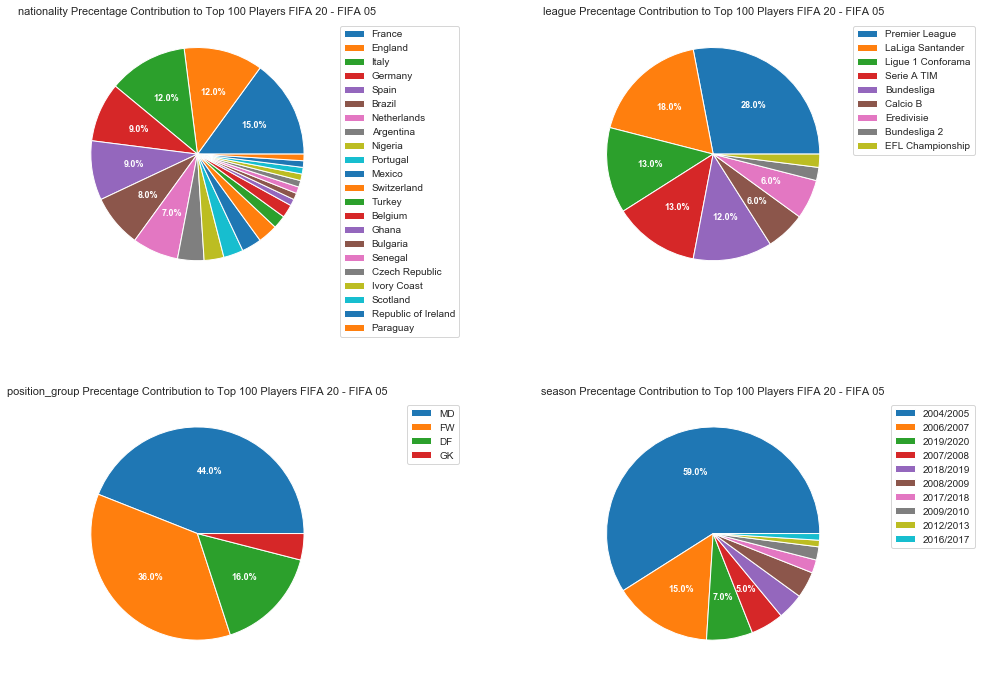

In [38]:
plot_breakdowns_for_data(top_hundred_wonderkids)

### Observation and Analysis

From the above analysis, more specifically the seasonal precentage contribution of the top hundred rated players and the top hundred wonderkids over the 16 year interval of FIFA the largest contributions are coming from much older FIFAs, this lead to an investigation on the progression of how players have been rated (overall and potential) over the past few years of FIFA

In [74]:
overall_potential_dict = {
    'max_overall': [],
    'mean_overall': [],
    'max_potential': [],
    'mean_potential': []
}
for season in seasons:
    current_season = ratings[ratings['season'] == season]
    overall_potential_dict['mean_overall'].append(current_season['overall'].mean())
    overall_potential_dict['max_overall'].append(current_season['overall'].max())
    overall_potential_dict['mean_potential'].append(current_season['potential'].mean())
    overall_potential_dict['max_potential'].append(current_season['potential'].max())

Text(0.5, 1.0, 'Average and Max Potential and Overall Year on Year (2020 - 2005)')

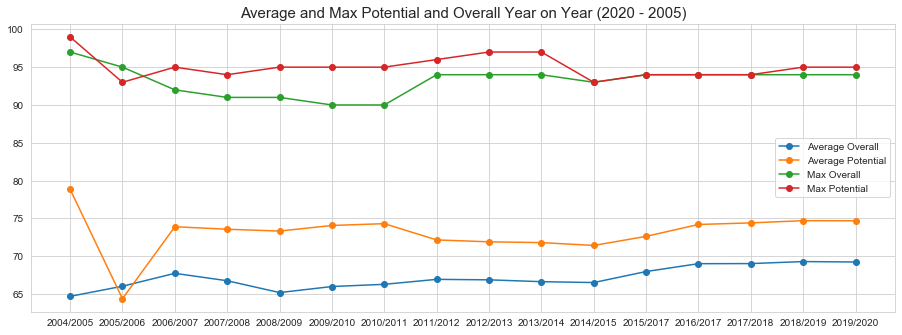

In [76]:
fig = plt.figure(figsize=(15,5))
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes.plot(seasons, overall_potential_dict['mean_overall'], marker='o', label='Average Overall')
axes.plot(seasons, overall_potential_dict['mean_potential'], marker='o', label='Average Potential')
axes.plot(seasons, overall_potential_dict['max_overall'], marker='o', label='Max Overall')
axes.plot(seasons, overall_potential_dict['max_potential'], marker='o', label='Max Potential')
axes.legend()
plt.title('Average and Max Potential and Overall Year on Year (2020 - 2005)', fontsize=15)


A small conclusion that can be made from the data up till now is according to fifa Football was at its peak in 20004/2005. Having the highest max and average overall and potential as well as contributing the most to the Top 100 Rated players and Top 100 Wonderkids in the 16 year range.